* 축소할 변수들
- Attr2, Attr3, Attr10, Attr25, Attr 38, Attr 51 
- Attr1, Attr7, Attr11, Attr14, Attr22, Attr35, Attr48
- Attr19, Attr23, Attr30, Attr31, Attr39, Attr43, Attr44, Attr49, Attr56, Attr58, Attr62

원래 이 위 corr 높은 변수들 중 변수 하나만 골라 남겨놨는데, 이 변수들로 pca 1차원으로 차원 축소 하기로 했다. 
그래서 위의 변수들을 없애고, pca 변수 세가지가 추가됐다. 
pca, fa는 해석을 하기가 어렵지만 위 변수들은 서로 corr이 높은만큼, 변수들의 의미가 비슷하여, 그 의미를 파악해서 pca 변수들을 해석하면 될 것 같다. 

하다보니 fa는 1차원으로 축소하는게 되지 않기 때문에, pca 만 했다. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [308]:
data= pd.read_csv("C:/Users/seung/Desktop/finalproject/ESC20SPRING_team4/imputed_dataV64.csv")
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,data$class
0,-0.024558,0.30051,0.10733,1.8368,34.382,-0.026711,-0.020067,2.2519,1.06670,0.67673,...,0.062497,-0.036289,0.93750,0.25454,13.6320,3.6930,69.389,5.2602,0.882600,0
1,0.639180,0.00000,1.00000,1.4059,29.678,-1.139300,0.760520,38.7960,1.11850,1.00000,...,0.679830,0.639180,0.32014,0.00000,6.5721,37.8860,0.000,7.0379,0.048449,0
2,-0.440760,0.47723,0.19260,1.4678,34.555,0.000000,-0.440760,1.0954,1.51860,0.52277,...,-0.290590,-0.843130,1.28710,0.12538,4.0387,2.5649,98.950,3.6887,3.837600,0
3,0.119520,0.17679,0.63546,4.5944,117.650,0.251540,0.148750,4.5826,1.12630,0.81017,...,0.112110,0.147520,0.88789,0.00000,8.9302,10.2870,40.355,9.0448,8.516900,0
4,0.230400,0.27095,0.23762,2.5745,-26.928,0.617540,0.282690,2.6907,0.80411,0.72905,...,0.459570,0.316020,0.62320,0.16465,7.9274,6.6605,68.502,5.3283,1.315000,0


outlier 많은 항목 제거

In [309]:
outlier = [999,3134,3528,2556,2655,6425,6233,4942,4612,1935,2064,6818,1594,2100,4680,4995,4120,5305,5936,5811]
data.drop(outlier, axis = 0, inplace = True)

corr높은변수들 중 FA, PCA 로 차원축소할 변수들 제외한 변수들 삭제 

In [310]:
remove_col =np.array(['Attr8', 'Attr50', 'Attr36', 'Attr4', 'Attr40', 'Attr50', 'Attr24',
       'Attr12', 'Attr16', 'Attr13', 'Attr28', 'Attr53', 'Attr32', 'Attr52',
       'Attr33', 'Attr34'])
data.drop(remove_col, axis =1, inplace = True)

In [311]:
data = data.reset_index()

In [312]:
data.drop(["index"], axis =1, inplace = True)

In [313]:
len(remove_col)

16

In [314]:
NAnum = data.isna().sum()
NAnum[NAnum !=0]

Attr17     15
Attr26     15
Attr44     14
Attr46     28
Attr54    162
Attr56     14
dtype: int64

NA 남아있는건 평균으로 imputation 하자

In [315]:
NAcol = ['Attr17','Attr26','Attr44','Attr46','Attr54','Attr56']

In [316]:
for i in NAcol :
    data[i] = data[i].fillna(np.mean(data[i]))

In [317]:
data.isna().sum()

Attr1         0
Attr2         0
Attr3         0
Attr5         0
Attr6         0
Attr7         0
Attr9         0
Attr10        0
Attr11        0
Attr14        0
Attr15        0
Attr17        0
Attr18        0
Attr19        0
Attr20        0
Attr21        0
Attr22        0
Attr23        0
Attr25        0
Attr26        0
Attr27        0
Attr29        0
Attr30        0
Attr31        0
Attr35        0
Attr38        0
Attr39        0
Attr41        0
Attr42        0
Attr43        0
Attr44        0
Attr45        0
Attr46        0
Attr47        0
Attr48        0
Attr49        0
Attr51        0
Attr54        0
Attr55        0
Attr56        0
Attr57        0
Attr58        0
Attr59        0
Attr60        0
Attr61        0
Attr62        0
Attr63        0
Attr64        0
data$class    0
dtype: int64

NA 제거 완료

* 축소할 변수들
- Attr2, Attr3, Attr10, Attr25, Attr 38, Attr 51 
- Attr1, Attr7, Attr11, Attr14, Attr22, Attr35, Attr48
- Attr19, Attr23, Attr30, Attr31, Attr39, Attr43, Attr44, Attr49, Attr56, Attr58, Attr62

In [208]:
fea1 = data.loc[:,["Attr2", "Attr3", "Attr10", "Attr25", "Attr38", "Attr51"]]
fea2 = data.loc[:,["Attr1", "Attr7", "Attr11", "Attr14", "Attr22", "Attr35", "Attr48"]]
fea3 = data.loc[:,["Attr19", "Attr23", "Attr30", "Attr31", "Attr39", "Attr43", "Attr44", "Attr49", "Attr56", "Attr58", "Attr62"]]

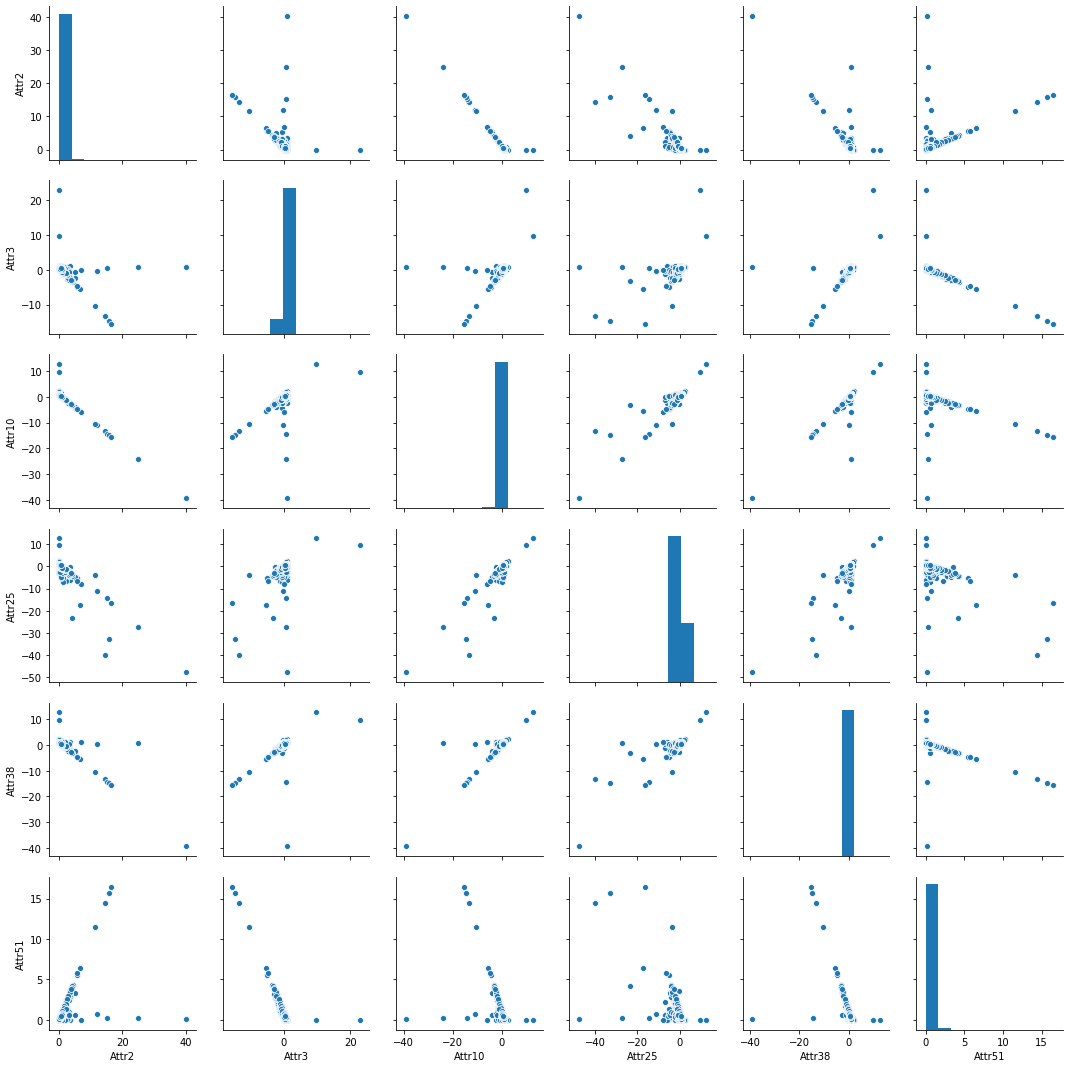

In [16]:
sns.pairplot(fea1)

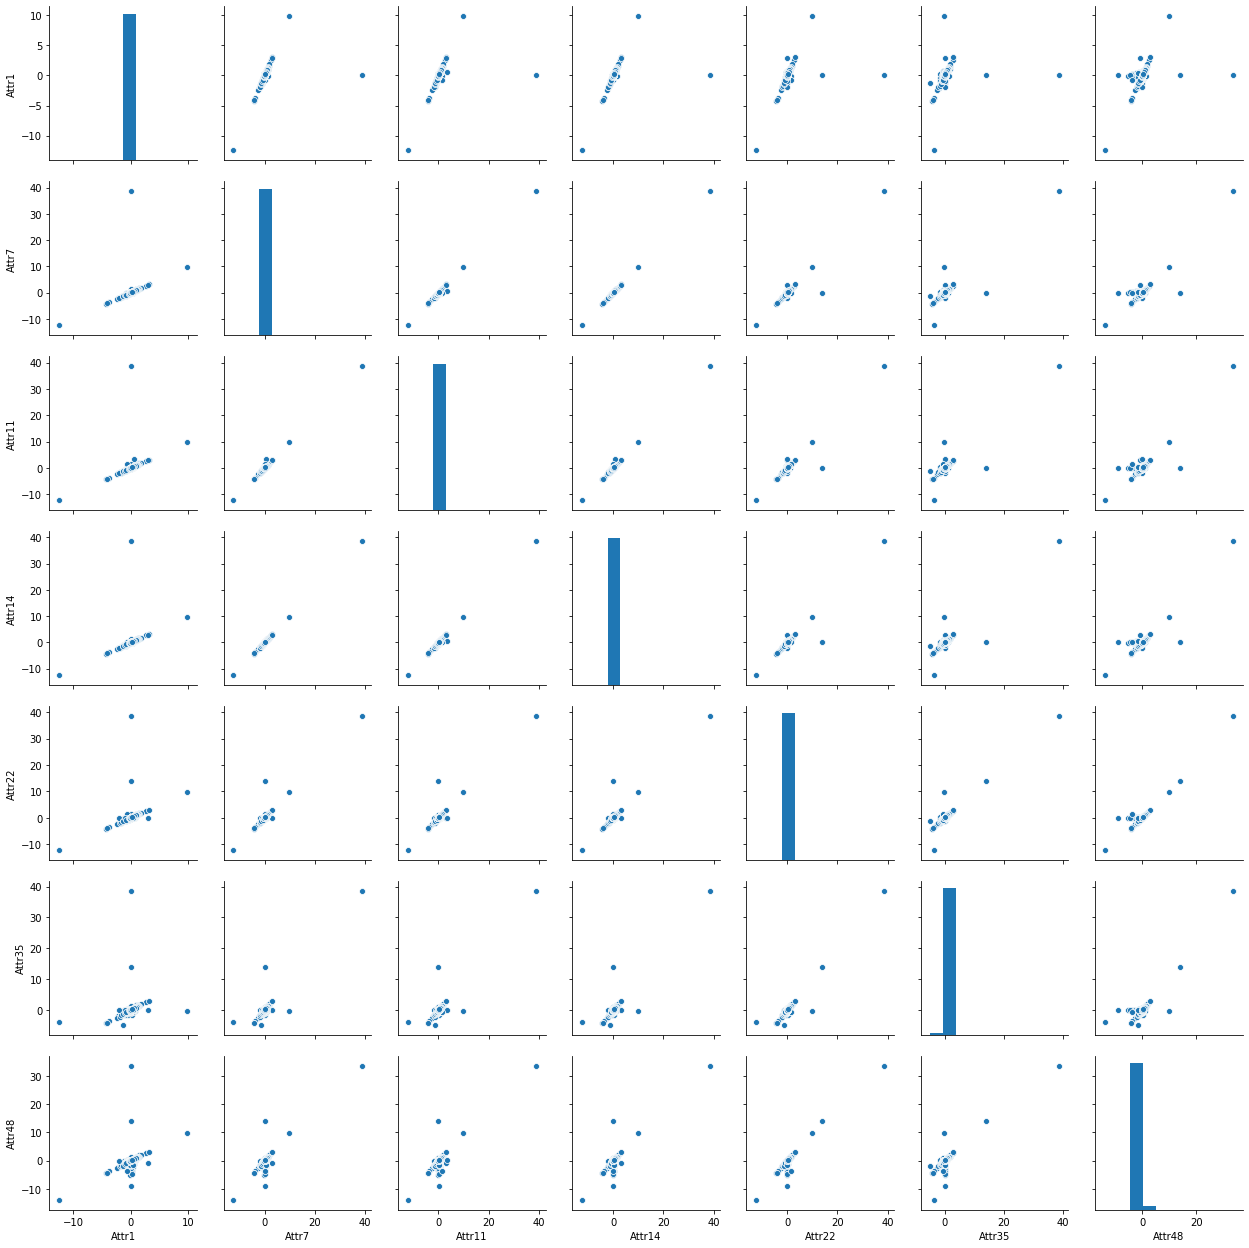

In [17]:
sns.pairplot(fea2)

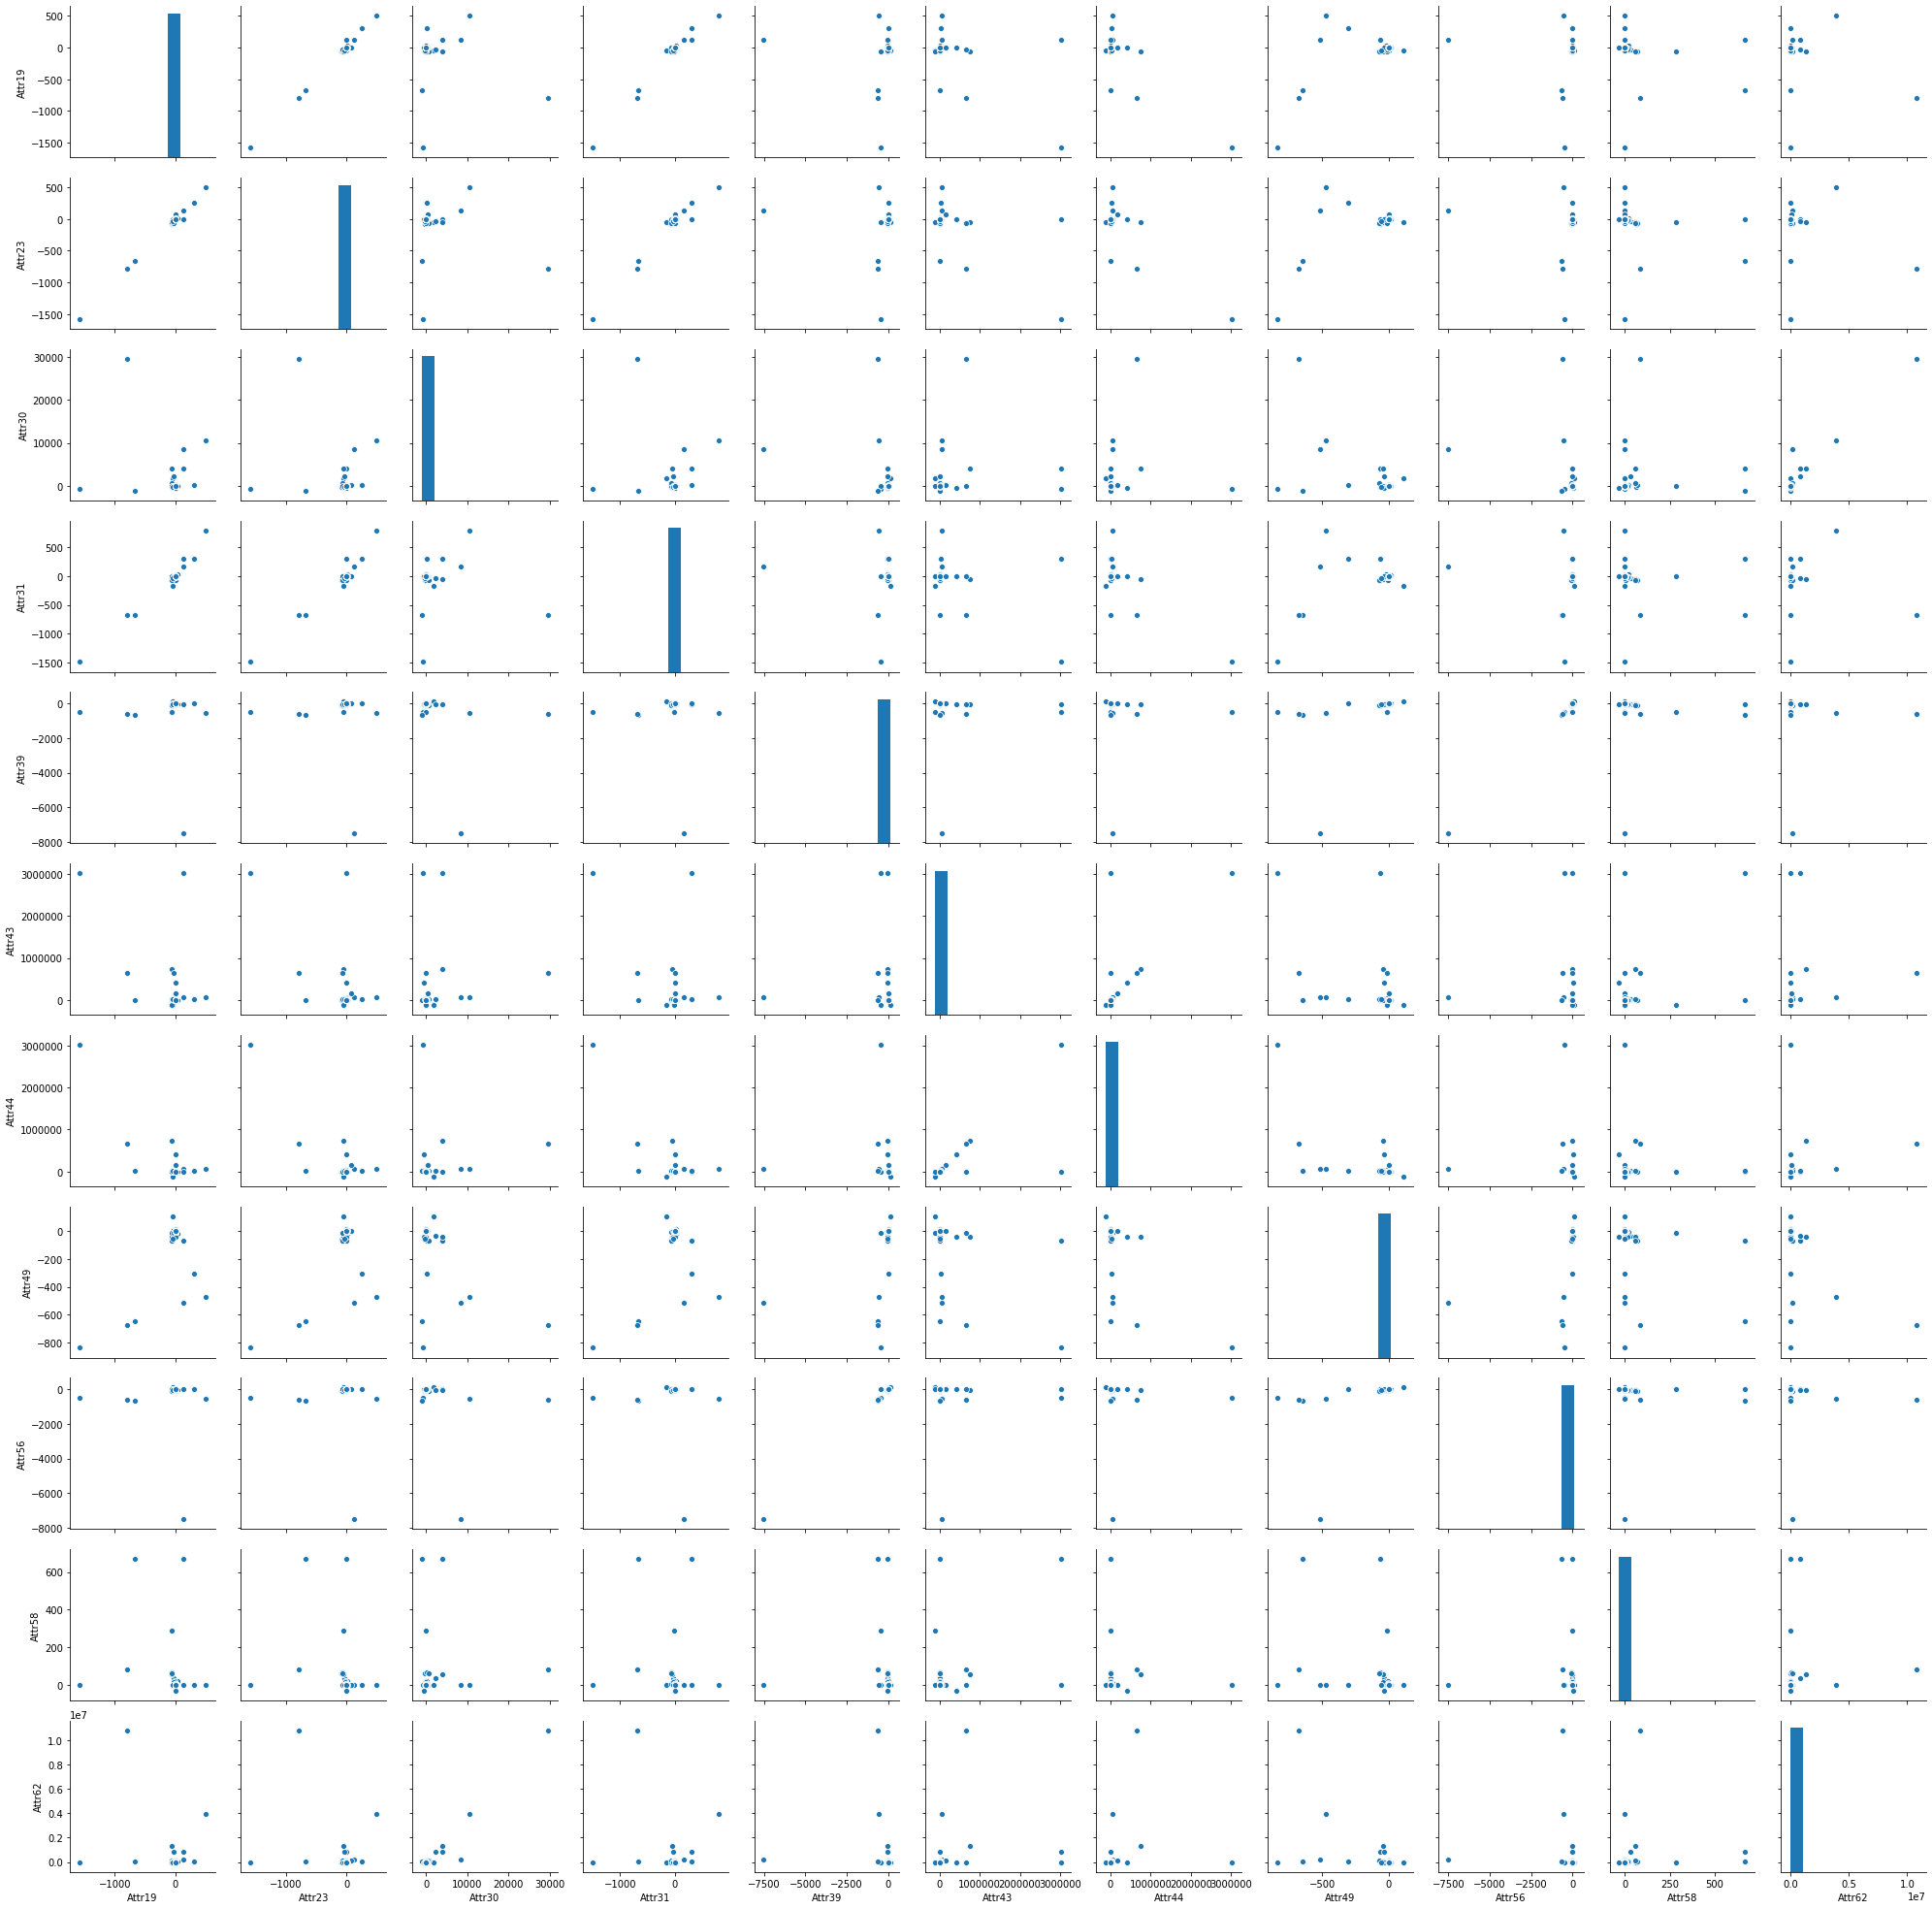

In [18]:
sns.pairplot(fea3)

In [209]:
from sklearn.preprocessing import StandardScaler
fea1 = StandardScaler().fit_transform(fea1)
fea2 = StandardScaler().fit_transform(fea2)
fea3 = StandardScaler().fit_transform(fea3)

In [210]:
cov_mat1 = np.cov(fea1.T)
eig_val1, eig_vec1 = np.linalg.eig(cov_mat1)
cov_mat2 = np.cov(fea2.T)
eig_val2, eig_vec2 = np.linalg.eig(cov_mat2)
cov_mat3 = np.cov(fea3.T)
eig_val3, eig_vec3 = np.linalg.eig(cov_mat3)

In [74]:
#fea1.shape[1]
eig_val1

array([4.60756937, 0.8278822 , 0.01199456, 0.13119333, 0.23053204,
       0.19170645])

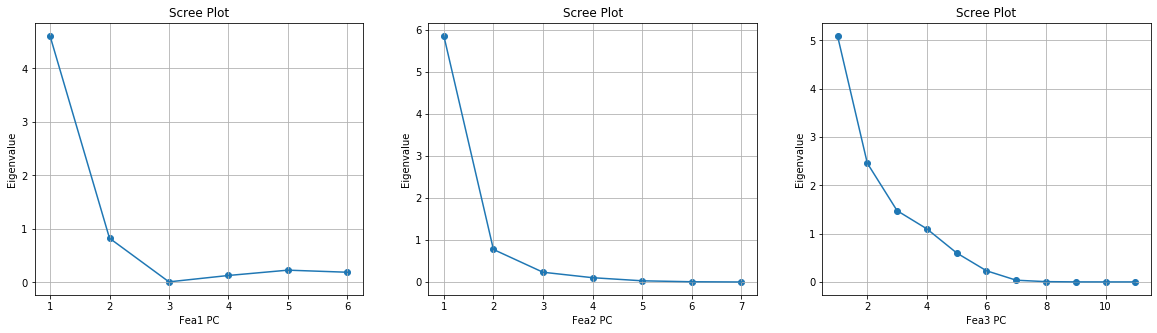

In [211]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
xvals = range(1, fea1.shape[1]+1)
ax1.scatter(xvals, eig_val1)
ax1.plot(xvals, eig_val1)
ax1.set_title('Scree Plot')
ax1.set_xlabel('Fea1 PC')
ax1.set_ylabel('Eigenvalue')
ax1.grid()

ax2 = fig.add_subplot(132)
xvals = range(1, fea2.shape[1]+1)
ax2.scatter(xvals, eig_val2)
ax2.plot(xvals, eig_val2)
ax2.set_title('Scree Plot')
ax2.set_xlabel('Fea2 PC')
ax2.set_ylabel('Eigenvalue')
ax2.grid()

ax3 = fig.add_subplot(133)
xvals = range(1, fea3.shape[1]+1)
ax3.scatter(xvals, eig_val3)
ax3.plot(xvals, eig_val3)
ax3.set_title('Scree Plot')
ax3.set_xlabel('Fea3 PC')
ax3.set_ylabel('Eigenvalue')
ax3.grid()

In [212]:
from sklearn.decomposition import PCA, FactorAnalysis
pca = PCA(n_components=1) # PCA 선언: 1차원으로 차원축소

# train으로 pca fitting
pca1 = pca.fit_transform(fea1)
print(pca.explained_variance_ratio_)
pca2 = pca.fit_transform(fea2)
print(pca.explained_variance_ratio_)
pca3 = pca.fit_transform(fea3)
print(pca.explained_variance_ratio_)

[0.76781588]
[0.83692496]
[0.46290351]


In [220]:
pca_df = pd.DataFrame(pd.concat([pd.DataFrame(pca1),pd.DataFrame(pca2),pd.DataFrame(pca3)], axis =1))
pca_df.columns = np.array(["pca1","pca2","pca3"])

pca 로 대체할 변수들 제거

In [318]:
col_to_pca =["Attr2", "Attr3", "Attr10", "Attr25", "Attr38", "Attr51","Attr1", "Attr7", "Attr11", "Attr14", "Attr22", "Attr35", "Attr48","Attr19", "Attr23", "Attr30", "Attr31", "Attr39", "Attr43", "Attr44", "Attr49", "Attr56", "Attr58", "Attr62"]
data.drop(col_to_pca, axis =1, inplace = True)

In [319]:
data.rename(columns = {'data$class' : 'class'}, inplace = True)

In [320]:
from sklearn.preprocessing import MinMaxScaler
data.iloc[:,:-1]= MinMaxScaler().fit_transform(data.iloc[:,:-1])

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


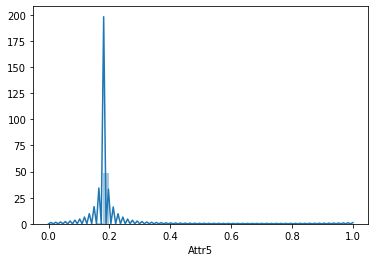

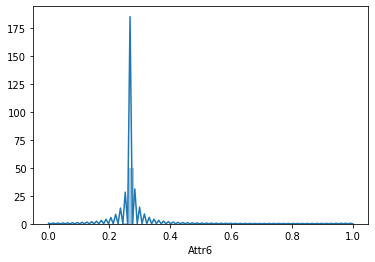

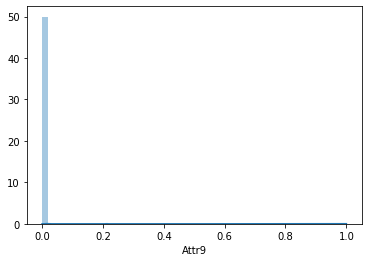

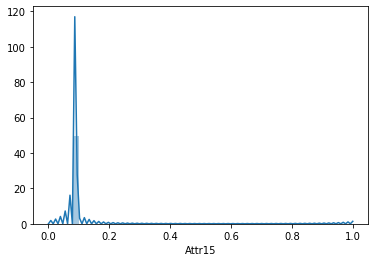

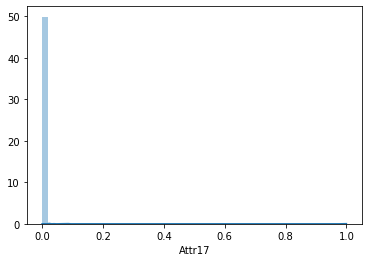

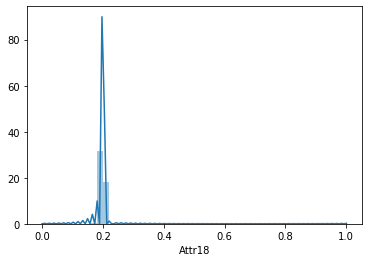

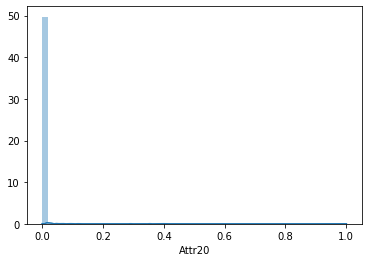

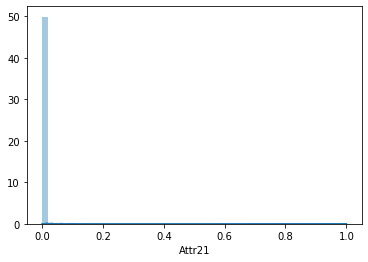

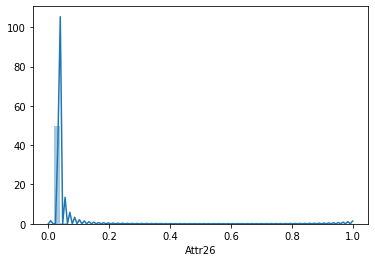

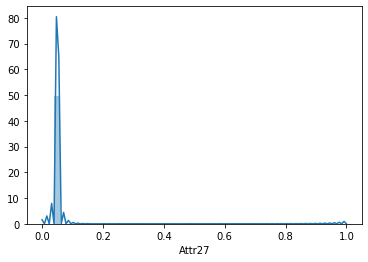

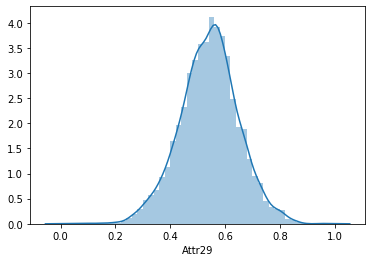

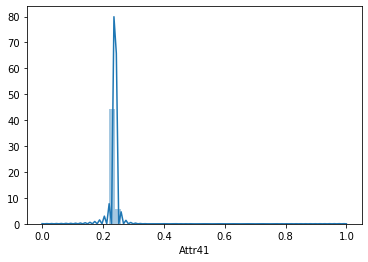

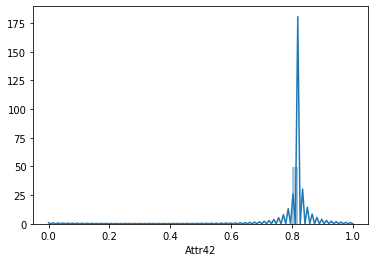

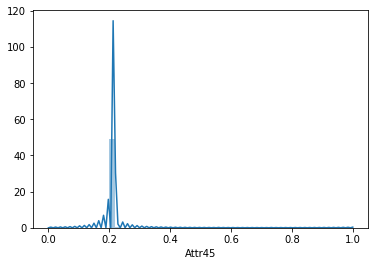

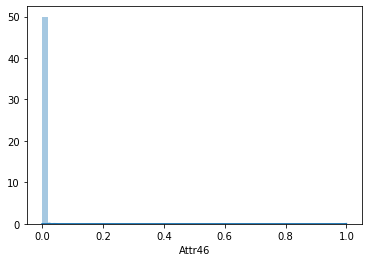

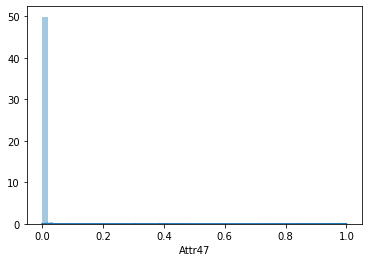

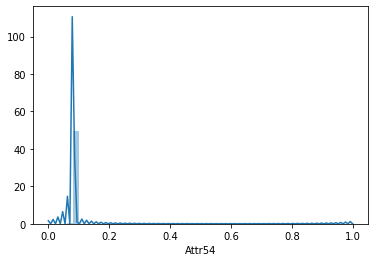

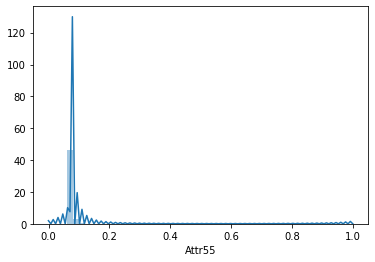

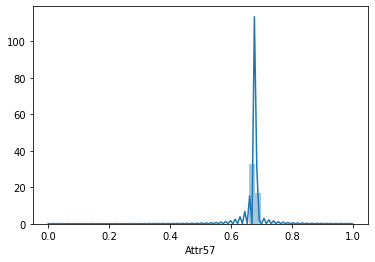

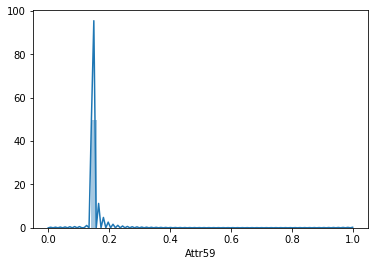

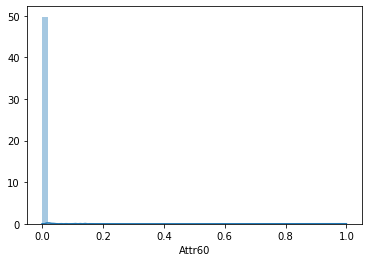

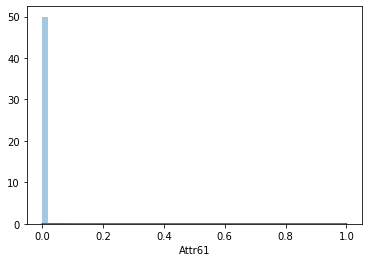

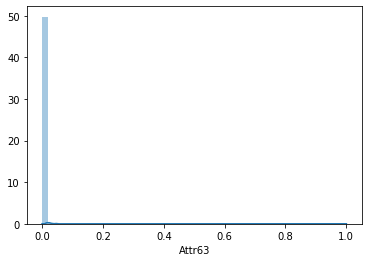

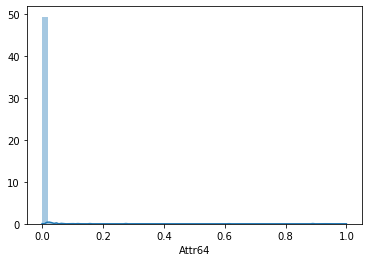

In [321]:
for i in data.columns[:-1]:
    plt.figure()
    sns.distplot(data[i])

- skew to left: "Attr5", "Attr6", "Attr9", "Attr15", "Attr17", "Attr18","Attr20", "Attr21", "Attr26", "Attr27","Attr41"......
- okay : "Attr29"
- skew to right:  "Attr42", "Attr57"

변수 세개 빼고 log가 필요하다

In [322]:
right = np.array(["Attr42", "Attr57"])
ok =np.array(["Attr29"])
left = []
for i in data.columns[:-1]:
    if (i not in right) & (i not in ok):
        left.append(i)
left = np.array(left)

In [323]:
for i in left:
    data[i] = np.log(data[i]+1)

In [324]:
for i in right:
    data[i] = data[i]**2

In [326]:
from sklearn.preprocessing import StandardScaler
data.iloc[:,:-1]= StandardScaler().fit_transform(data.iloc[:,:-1])

In [328]:
pca_data = pd.DataFrame(pd.concat([pca_df,data], axis =1))

In [329]:
pca_data.to_csv("C:/Users/seung/Desktop/finalproject/pca_data.csv")